# Bioinformatics workflow exercise: SoS and linear mixed model

Author: Haoyue Shuai, Nov 17, 2020

This tutorial introduces a workflow language, Script of Scripts (SoS), for bioinformatics analysis pipelines, with an example implementation of various linear mixed model methods for genetic association studies.

This is an SoS Notebook with SoS kernel cells containing workflow steps written in SoS, and bash kernel cells to run these workflow steps. Please run bash codes here directly in this notebook so the output will be saved to the notebook.

## Jupyter Lab setup

Download this notebook and launch it with [JupyterLab](https://jupyter.org/). You can follow [these suggested setup instructions](http://statgen.us/lab-wiki/orientation/jupyter-setup.html).

Please first making sure you have all the kernels needed. They should be available after all software are installed as instructed:

In [1]:
jupyter kernelspec list

Available kernels:
  bash        /home/gw/.local/share/jupyter/kernels/bash
  ir          /home/gw/.local/share/jupyter/kernels/ir
  markdown    /home/gw/.local/share/jupyter/kernels/markdown
  sos         /home/gw/.local/share/jupyter/kernels/sos
  python3     /opt/miniconda3/share/jupyter/kernels/python3


## Basics of SoS

LMM is writen in SoS workflow, where we can use multiple programming languages within one notebook. Here we illustrate how it works with some simple examples.

### Parameter setting

In the global chunk. We define 2 parameters, n and beta. They will be called in the later chunks.

In [2]:
[global]
# parameter 1
parameter: n = 1.0
# parameter 2
parameter: beta = [1.0,2.0,3.0]

### Some Bash code

We name this workflow `print_n`. In SoS, workflow steps are identified as text inside `[]`.

We configure the string formatting for variable values as `${ }` so that SoS can complete the script replacing values inside `${ }` with specified values.

Here we run a bash script to print the value of `n` specified as 1.0 in the `global` section.

In [3]:
# Print the value of n with bash
[print_n]
bash: expand = '${ }'
    echo ${n}

**To run the workflow above:**

You could not run the chunk directly. It's pretty much like how you define a function in python or R, you can only run it by calling it:

e.g. to run the workflow of `print_n` in this notebook:

In [4]:
sos run orientation.ipynb print_n

INFO: Running print_n: Print the value of n with bash
1.0
INFO: print_n is completed.
INFO: Workflow print_n (ID=w4bcbb8958466f710) is executed successfully with 1 completed step.


**We can also assign a new value to n:**

In [8]:
sos run orientation.ipynb print_n --n 999

INFO: Running print_n: Print the value of n with bash
999.0
INFO: print_n is completed.
INFO: Workflow print_n (ID=w141f00df6c6697d6) is executed successfully with 1 completed step.


### Some other Bash code

Same as how we print `n`, here we run bash commands to print `beta`.


In [9]:
# Print the value of beta with bash
[print_beta]
bash: expand = '${ }'
    echo ${beta}

**To run the workflow above:**

In [10]:
sos run orientation.ipynb print_beta

INFO: Running print_beta: Print the value of beta with bash
[1.0, 2.0, 3.0]
INFO: print_beta is completed.
INFO: Workflow print_beta (ID=w78fa93e094c77376) is executed successfully with 1 completed step.


### Some Python code

Same as how we run bash, here we run python commands to print log `beta`.


In [11]:
# Print log(beta) with Python
[log_beta]
python: expand = '${ }'
    import numpy as np
    print(np.log(${beta}))

**To run the workflow above:**

In [12]:
sos run orientation.ipynb log_beta

INFO: Running log_beta: Print log(beta) with Python
[0.         0.69314718 1.09861229]
INFO: log_beta is completed.
INFO: Workflow log_beta (ID=w077f5b194f70ad1b) is executed successfully with 1 completed step.


### Some R code

Now we run R commands to print exp of `n`.


In [13]:
# Print exp(n) with R
[exp_n]
R: expand = '${ }'
    print(exp(${n}))

**To run the workflow above:**

In [14]:
sos run orientation.ipynb exp_n

INFO: Running exp_n: Print exp(n) with R
[1] 2.718282
INFO: exp_n is completed.
INFO: Workflow exp_n (ID=w68dec66676a24f9f) is executed successfully with 1 completed step.


## Command interface for SoS scripts

To show what workflows are available in this notebook:

In [15]:
sos run orientation.ipynb -h

usage: sos run orientation.ipynb [workflow_name | -t targets] [options] [workflow_options]
  workflow_name:        Single or combined workflows defined in this script
  targets:              One or more targets to generate
  options:              Single-hyphen sos parameters (see "sos run -h" for details)
  workflow_options:     Double-hyphen workflow-specific parameters

Workflows:
  print_n
  print_beta
  log_beta
  exp_n

Global Workflow Options:
  --n 1.0 (as float)
                        parameter 1
  --beta 1.0 2.0 3.0 (as list)
                        parameter 2

Sections
  print_n:              Print the value of n with bash
  print_beta:           Print the value of beta with bash
  log_beta:             Print log(beta) with Python
  exp_n:                Print exp(n) with R


**As we have workflows print_n, print_beta, log_beta, exp_n here, we have workflows fastGWA, boltlmm, regenie, etc in the LMM (linear mixed model pipeline)** available in `LMM.ipynb`under `workflow` folder of this repository:


In [ ]:
%cd .. 

In [17]:
ls

analysis  data  hello.md  notebook  output  README.md  students  workflow


In [15]:
sos run workflow/LMM.ipynb -h

usage: sos run workflow/LMM.ipynb [workflow_name | -t targets] [options] [workflow_options]
  workflow_name:        Single or combined workflows defined in this script
  targets:              One or more targets to generate
  options:              Single-hyphen sos parameters (see "sos run -h" for details)
  workflow_options:     Double-hyphen workflow-specific parameters

Workflows:
  boltlmm
  gcta
  fastGWA
  regenie
  SAIGE

Global Workflow Options:
  --cwd VAL (as path, required)
                        the output directory for generated files
  --sampleFile VAL (as path, required)
                        Path to sample file
  --bfile VAL (as path, required)
                        Genotype files in plink binary this is used for
                        computing the GRM
  --genoFile  paths

                        Path to bgen or bed files
  --phenoFile VAL (as path, required)
                        Phenotype file for quantitative trait (BMI)
  --phenoCol VAL VAL ... (as type, re

**Please open up LMM.ipynb with JupyterLab and take a look at the document.** You will see several pipelines written in SoS language for R, Python and Shell scripts. In order to execute this pipeline without having to install various bioinformatics software, we have provided an option `--container-lmm` to specify the docker image with preconfigured software environment, and provided a default docker image to use. In order to run it you must install `docker`. If you use MacOS with `homebrew` package manager you can Google search "Install docker on MacOS homebrew". If you use Windows with WSL then you can follow tutorials to install docker on Linux, which will work for your WSL.

We will execute these pipelines after you successfully installed `docker`.

## Run LMM

Here is a minimal working example (MWE) to illustrate the LMM pipelines:

In [16]:
ls data/LMM_MWE

boltlmm_template.yml           imputed_genotypes_chr21.bgen
fastGWA_template.yml           imputed_genotypes_chr21.bgen.bgi
genetic_map_hg19_withX.txt.gz  imputed_genotypes_chr22.bgen
genotype_inventory.txt         imputed_genotypes_chr22.bgen.bgi
genotypes21_22.bed             imputed_genotypes.sample
genotypes21_22.bim             LDSCORE.1000G_EUR.tab.gz
genotypes21_22.fam             phenotypes.txt
genotypes.bed                  regenie_template.yml
genotypes.bim                  regions.txt
genotypes.fam                  unrelated_samples.txt


Now we will call the `fastGWA` workflow defined in the `LMM.ipynb` by running this command:

In [17]:
sos run LMM.ipynb fastGWA \
    --cwd output \
    --bfile data/LMM_MWE/genotypes.bed \
    --sampleFile data/LMM_MWE/imputed_genotypes.sample \
    --genoFile data/LMM_MWE/imputed_genotypes_chr*.bgen \
    --phenoFile data/LMM_MWE/phenotypes.txt \
    --formatFile data/LMM_MWE/fastGWA_template.yml \
    --phenoCol BMI \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 1 \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.1 \
    --parts 2 \
    --p-filter 1

INFO: Running fastGWA_1: fastGWA mixed model (based on the sparse GRM generated above)
INFO: Running gcta_1: Partition the GRM into 100 parts and allocate 8GB memory to each job
HINT: Pulling docker image statisticalgenetics/lmm:1.6
HINT: Docker image statisticalgenetics/lmm:1.6 is now up to date
INFO: gcta_1 (index=0) is completed.
INFO: gcta_1 (index=1) is completed.
INFO: gcta_1 output:   data/LMM_MWE/output/cache/genotypes.part_2_1.grm.bin data/LMM_MWE/output/cache/genotypes.part_2_1.grm.N.bin... (6 items in 2 groups)
INFO: Running gcta_2: Merge all the parts together (Linux, Mac)
INFO: gcta_2 is completed.
INFO: gcta_2 output:   data/LMM_MWE/output/genotypes.grm.bin data/LMM_MWE/output/genotypes.grm.N.bin... (3 items)
INFO: Running gcta_3: Make a sparse GRM from the merged full-dense GRM
INFO: gcta_3 is completed.
INFO: gcta_3 output:   data/LMM_MWE/output/genotypes.grm.sp
INFO: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: 

**Once it finished succesfully, you should be able to find the result files in the output folder. Lets take a look at the manhataan plot.**

> output/phenotypes_BMI.fastGWA.manhattan.png (51.4 KiB):

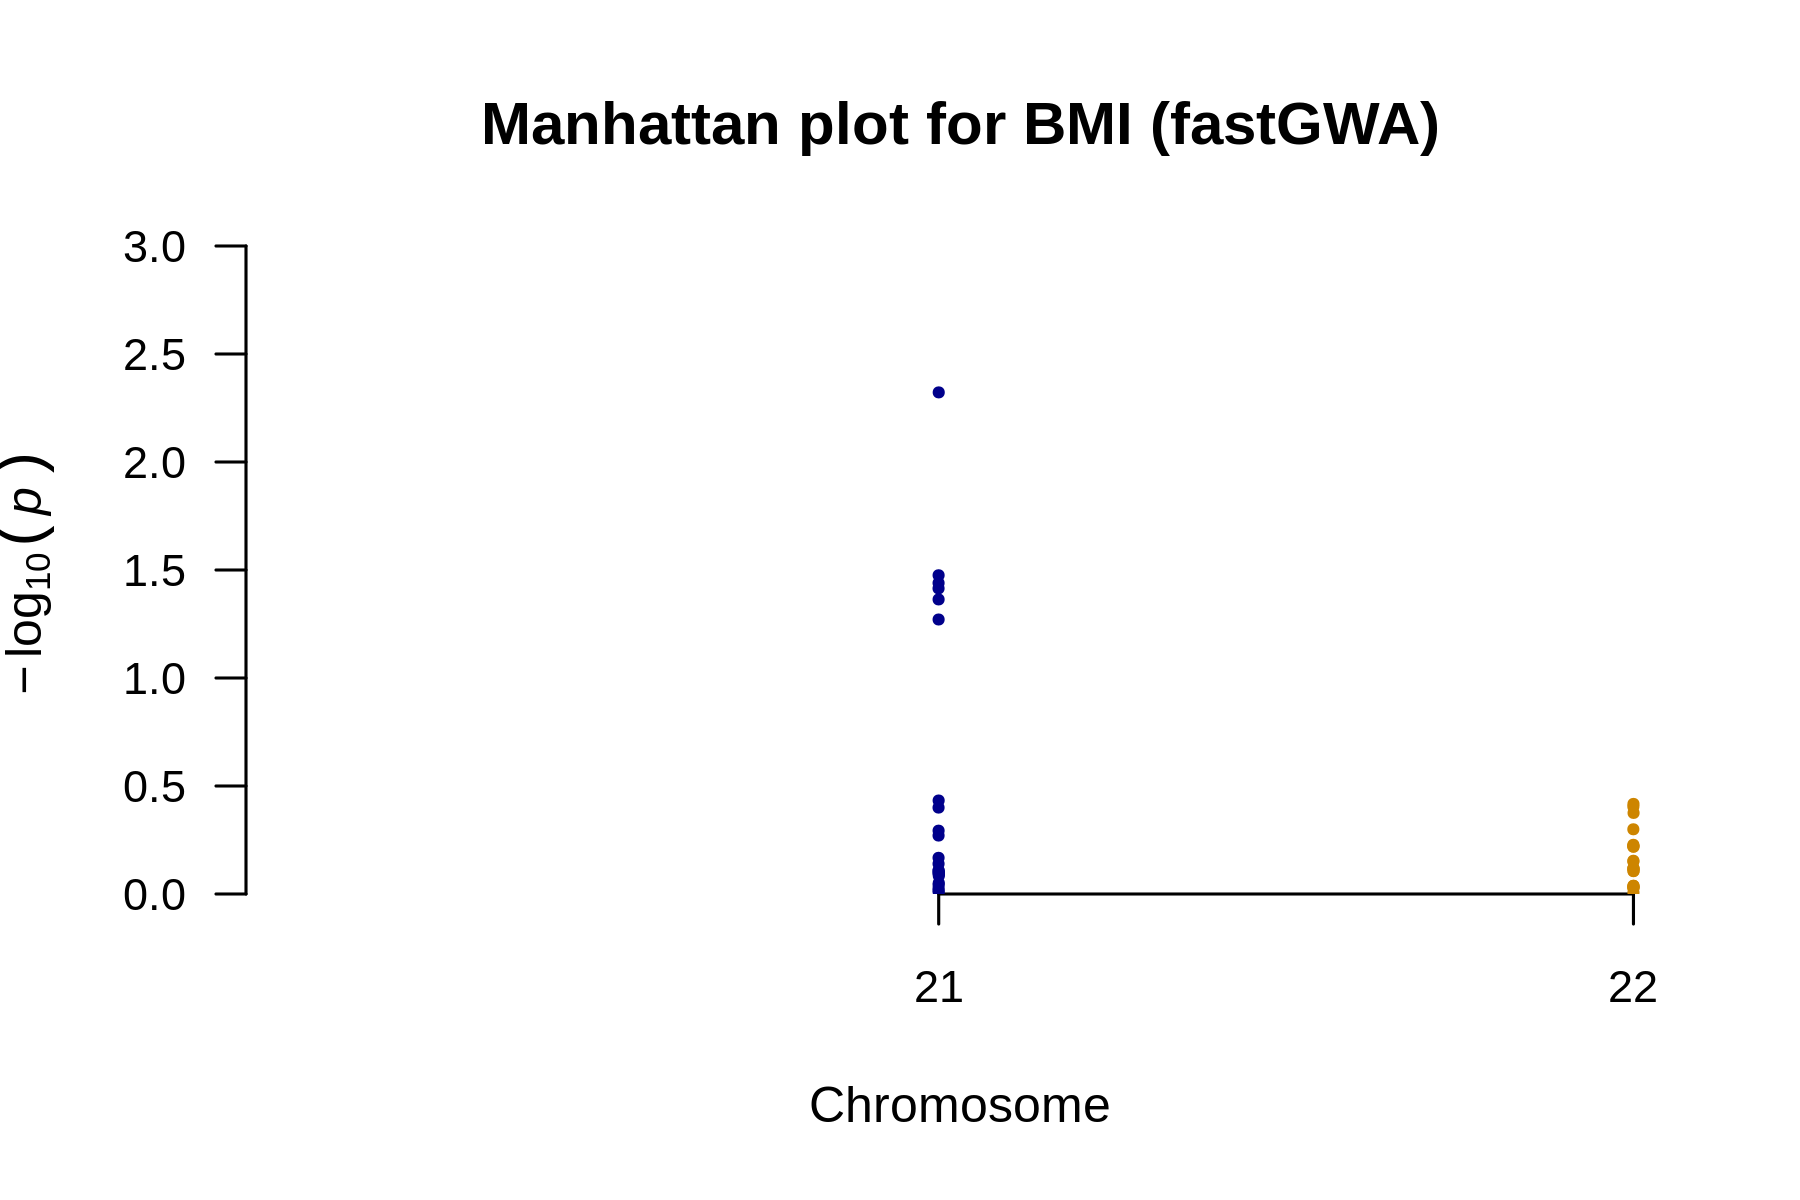

In [18]:
%preview output/phenotypes_BMI.fastGWA.manhattan.png

## Quiz

Please try to run BoltLMM and Regenie pipelines on your own as instructed in `LMM.ipynb`, show the results (command output and figures as in the `fastGWA` example) in this notebook below, save it for now but **do not** push it back to your forked repo on github. You will find instructions in Task 4 how to communicate the analysis back to us.

The Regenie pipeline should run without an error, **but you will run into issues with BoltLMM**. The screen output for this error message is not immediately informative but it contains some information for you to locate what exactly the problem is. This is a very typical scenario in our daily research. Please try to identify where the bug is, and point it out in discussions below (you don't have to fix it although you are welcome to try and show us how far you can make it!).